# Chapter 11: Fundamentals of Estimation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

## Likelihood Principle

In [4]:
x = np.array([4,3,5,13,7,10,9,9,3,6,4,3,7,10,7,6,7,8,7,7])
lam = 6
scipy.stats.poisson.pmf(k = 4, mu = lam)

0.13385261753998332

In [5]:
x = np.array([4,3,5,13,7,10,9,9,3,6,4,3,7,10,7,6,7,8,7,7])
lam = 6
p = scipy.stats.poisson.pmf(k = x, mu = lam)
print(np.round(p,3))

[0.134 0.089 0.161 0.005 0.138 0.041 0.069 0.069 0.089 0.161 0.134 0.089
 0.138 0.041 0.138 0.161 0.138 0.103 0.138 0.138]


In [6]:
lam = 6
p = scipy.stats.poisson.pmf(k = x, mu = lam)
L = np.prod(p)
print(L)

1.559273542483997e-21


In [7]:
lam = 6
p = scipy.stats.poisson.pmf(k = x, mu = lam)
LL = np.sum(np.log((p)))
print(LL)


-47.91006691797001


In [8]:
def LLpois(lam):
    p = scipy.stats.poisson.pmf(k = x, mu = lam)
    LL = np.sum(np.log((p)))
    return LL
LLpois(5) 

-52.5234770851539

In [9]:
np.mean(x)

6.75

## Yet Another Distribution!

In [10]:
np.random.seed(987654321)
paramdist = [np.mean(np.random.choice(x, size=len(x), replace=True)) for i in range(10000)]

plt.show()

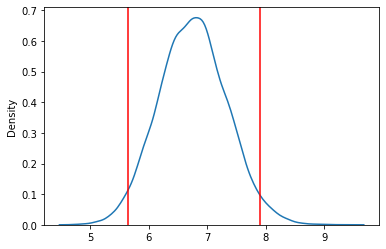

95% Confindence Interval = [5.65, 7.90]


In [11]:
q1 = np.percentile(paramdist, 0.05/2 * 100)
q2 = np.percentile(paramdist, (1-(0.05/2)) * 100)
sns.kdeplot(paramdist)
plt.axvline(q1, color='r', linestyle='-')
plt.axvline(q2, color='r', linestyle='-')
plt.show()
print("95% Confindence Interval = [{:.2f}, {:.2f}]".format(q1,q2))

## Optimizing Computationally

In [12]:
def LLpois(lam):
    p = scipy.stats.poisson.pmf(k = x, mu = lam)
    LL = np.sum(np.log((p)))
    return(-1*LL)
res1 = scipy.optimize.minimize(LLpois, x0 = 10)
print(res1) 

      fun: 47.009357104358244
 hess_inv: array([[0.3373221]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([6.75000007])


## Numeric Outcome

In [21]:
admissions = pd.read_csv("../data/admission.csv")

In [26]:
def LLnorm(mean1, standdev):
    p = scipy.stats.norm.pdf(x = admissions.GMAT, loc = mean1, scale = standdev)
    LL = np.sum(np.log(p))
    return(-1*LL)
res1 = scipy.optimize.minimize(LLnorm, x0 = 500, args = (100,))
print(res1)

      fun: 497.4619917221318
 hess_inv: array([[117.62970787]])
      jac: array([3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([488.44782756])


## Binary Outcome

Important Notice: We need to add a constraint that limits the values of the variables to be between 0 and 1 corresponding to the probabilities. Otherwise we get an error from the log function for negative values.

In [36]:
def LLbinary(pi):
    p = np.where(admissions.De == "admit", pi, 1 - pi)
    LL = np.sum(np.log(p))
    return(-1*LL)
constraint = ({'type': 'eq', 'fun': lambda x: x[0]+(1-x[0])})
res1 = scipy.optimize.minimize(LLbinary, x0 = .5, constraints=constraint)
print(res1)


     fun: 55.76661494816657
     jac: array([0.])
 message: 'Positive directional derivative for linesearch'
    nfev: 207
     nit: 27
    njev: 23
  status: 8
 success: False
       x: array([0.36470587])


C:\Users\stefan\AppData\Local\Temp/ipykernel_20540/3305734102.py:3: RuntimeWarning: invalid value encountered in log
  LL = np.sum(np.log(p))


In [40]:
# R:
#dpois(3,lambda = -10)
# Python:
scipy.stats.poisson.pmf(k = 3, mu = -10)

nan